# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Raditya Nauval Amirullah
- Email: radityaganesha01@gmail.com
- Id Dicoding: zerornx

## Persiapan

### Menyiapkan library yang dibutuhkan

Pada tahap ini, kita akan mengimport semua library yang akan digunakan selama pengerjaan proyek data science. Beberapa library yang akan digunakan meliputi:

- Pandas -> Library pandas digunakan untuk melakukan analisis data serta manipulasi terhadap data tersebut.
- NumPy -> Library numpy digunakan untuk melakukan operasi numerik.
- Matplotlib dan Seaborn -> Library ini digunakan untuk melakukan visualisasi data agar data tersebut lebih mudah dipahami.
- Scikit-learn -> Library ini digunakan untuk pembuatan model machine learning serta melakukan preprocessing data.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.utils import resample, shuffle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import joblib

### Menyiapkan data yang akan digunakan

In [42]:
df = pd.read_csv('data.csv', sep=';')

df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [43]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [44]:
df['Gender'].value_counts()

Gender
0    2868
1    1556
Name: count, dtype: int64

In [45]:
df.head().T

,0,1,2,3,4
Marital_status,1,1,1,1,2
Application_mode,17,15,1,17,39
Application_order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime_evening_attendance,1,1,1,1,0
Previous_qualification,1,1,1,1,1
Previous_qualification_grade,122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mothers_qualification,19,1,37,38,37
Fathers_qualification,12,3,37,37,38


## Data Understanding

Tahapan ini bertujuan untuk memahami struktur serta karakteristik dari data yang digunakan. Beberapa hal yang akan dilakukan pada tahapan ini antara lain:

- Melihat dimensi data (jumlah baris dan kolom).
- Memahami tipe data dari setiap kolom.
- Descriptive statistics seperti mean, median, dan standard deviation.
- Mendeteksi missing values dan outliers.
- Visualisasi data untuk eksplorasi lebih lanjut.

Berikut beberapa informasi terkait dari features / kolom pada dataset:

| Nama Kolom                                | Deskripsi                                                                                                                                                                                                                           |
|-------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Status perkawinan                         | Status perkawinan mahasiswa. (Kategorikal) 1 – lajang 2 – menikah 3 – duda/janda 4 – bercerai 5 – persatuan faktual 6 – terpisah secara hukum                                                                                       |
| Mode aplikasi                             | Metode aplikasi yang digunakan oleh mahasiswa. (Kategorikal) 1 - fase 1 - kontingen umum 2 - Peraturan No. 612/93 5 - fase 1 - kontingen khusus (Kepulauan Azores) 7 - Pemegang kursus tinggi lainnya 10 - Peraturan No. 854-B/99 15 - Mahasiswa internasional (sarjana) 16 - fase 1 - kontingen khusus (Pulau Madeira) 17 - fase 2 - kontingen umum 18 - fase 3 - kontingen umum 26 - Peraturan No. 533-A/99, item b2) (Rencana Berbeda) 27 - Peraturan No. 533-A/99, item b3 (Institusi Lain) 39 - Usia di atas 23 tahun 42 - Transfer 43 - Perubahan kursus 44 - Pemegang diploma spesialisasi teknologi 51 - Perubahan institusi/kursus 53 - Pemegang diploma siklus pendek 57 - Perubahan institusi/kursus (Internasional)|
| Urutan aplikasi                            | Urutan aplikasi mahasiswa. (Numerikal) Urutan aplikasi (antara 0 - pilihan pertama; dan 9 - pilihan terakhir)                                                                                                                        |
| Kursus                                    | Kursus yang diambil oleh mahasiswa. (Kategorikal) 33 - Teknologi Produksi Biofuel 171 - Desain Animasi dan Multimedia 8014 - Layanan Sosial (kehadiran malam) 9003 - Agronomi 9070 - Desain Komunikasi 9085 - Keperawatan Hewan 9119 - Teknik Informatika 9130 - Ekokultur 9147 - Manajemen 9238 - Layanan Sosial 9254 - Pariwisata 9500 - Keperawatan 9556 - Kebersihan Mulut 9670 - Manajemen Periklanan dan Pemasaran 9773 - Jurnalisme dan Komunikasi 9853 - Pendidikan Dasar 9991 - Manajemen (kehadiran malam)|
| Kehadiran siang/malam                      | Apakah mahasiswa menghadiri kelas di siang atau malam hari. (Kategorikal) 1 – siang 0 - malam                                                                                                                                       |
| Kualifikasi sebelumnya                     | Kualifikasi yang diperoleh mahasiswa sebelum mendaftar di pendidikan tinggi. (Kategorikal) 1 - Pendidikan menengah 2 - Pendidikan tinggi - gelar sarjana 3 - Pendidikan tinggi - gelar 4 - Pendidikan tinggi - magister 5 - Pendidikan tinggi - doktor 6 - Frekuensi pendidikan tinggi 9 - Tahun ke-12 - tidak selesai 10 - Tahun ke-11 - tidak selesai 12 - Lainnya - Tahun ke-11 14 - Tahun ke-10 15 - Tahun ke-10 - tidak selesai 19 - Pendidikan dasar siklus ke-3 (tahun 9/10/11) atau setara 38 - Pendidikan dasar siklus ke-2 (tahun 6/7/8) atau setara 39 - Kursus spesialisasi teknologi 40 - Pendidikan tinggi - gelar (siklus 1) 42 - Kursus teknis tinggi profesional 43 - Pendidikan tinggi - master (siklus 2) |
| Nilai kualifikasi sebelumnya               | Nilai kualifikasi sebelumnya (antara 0 dan 200)                                                                                                                                                                                      |
| Kewarganegaraan                            | Kewarganegaraan mahasiswa. (Kategorikal) 1 - Portugis; 2 - Jerman; 6 - Spanyol; 11 - Italia; 13 - Belanda; 14 - Inggris; 17 - Lithuania; 21 - Angola; 22 - Tanjung Verde; 24 - Guinea; 25 - Mozambik; 26 - São Tomé; 32 - Turki; 41 - Brasil; 62 - Rumania; 100 - Moldova (Republik); 101 - Meksiko; 103 - Ukraina; 105 - Rusia; 108 - Kuba; 109 - Kolombia|
| Kualifikasi ibu                            | Kualifikasi ibu mahasiswa. (Kategorikal) 1 - Pendidikan Menengah - Tahun ke-12 atau Setara 2 - Pendidikan Tinggi - Sarjana 3 - Pendidikan Tinggi - Gelar 4 - Pendidikan Tinggi - Magister 5 - Pendidikan Tinggi - Doktor 6 - Frekuensi Pendidikan Tinggi 9 - Tahun ke-12 - Tidak Selesai 10 - Tahun ke-11 - Tidak Selesai 11 - Tahun ke-7 (Lama) 12 - Lainnya - Tahun ke-11 14 - Tahun ke-10 18 - Kursus perdagangan umum 19 - Pendidikan Dasar Siklus ke-3 (tahun 9/10/11) atau Setara 22 - Kursus teknis-profesional 26 - Tahun ke-7 27 - Siklus ke-2 kursus sekolah umum 29 - Tahun ke-9 - Tidak Selesai 30 - Tahun ke-8 34 - Tidak Diketahui 35 - Tidak bisa membaca atau menulis 36 - Bisa membaca tanpa memiliki tahun ke-4 sekolah 37 - Pendidikan dasar siklus ke-1 (tahun 4/5) atau setara 38 - Pendidikan Dasar Siklus ke-2 (tahun 6/7/8) atau Setara 39 - Kursus spesialisasi teknologi 40 - Pendidikan tinggi - gelar (siklus 1) 41 - Kursus studi tinggi khusus 42 - Kursus teknis tinggi profesional 43 - Pendidikan Tinggi - Magister (siklus 2) 44 - Pendidikan Tinggi - Doktor (siklus 3) |
| Kualifikasi ayah                           | Kualifikasi ayah mahasiswa. (Kategorikal) 1 - Pendidikan Menengah - Tahun ke-12 atau Setara 2 - Pendidikan Tinggi - Sarjana 3 - Pendidikan Tinggi - Gelar 4 - Pendidikan Tinggi - Magister 5 - Pendidikan Tinggi - Doktor 6 - Frekuensi Pendidikan Tinggi 9 - Tahun ke-12 - Tidak Selesai 10 - Tahun ke-11 - Tidak Selesai 11 - Tahun ke-7 (Lama) 12 - Lainnya - Tahun ke-11 13 - Tahun ke-2 kursus pelengkap sekolah menengah 14 - Tahun ke-10 18 - Kursus perdagangan umum 19 - Pendidikan Dasar Siklus ke-3 (tahun 9/10/11) atau Setara 20 - Kursus Pelengkap Sekolah Menengah 22 - Kursus teknis-profesional 25 - Kursus Pelengkap Sekolah Menengah - tidak selesai 26 - Tahun ke-7 27 - Siklus ke-2 kursus sekolah umum 29 - Tahun ke-9 - Tidak Selesai 30 - Tahun ke-8 31 - Kursus Umum Administrasi dan Perdagangan 33 - Akuntansi dan Administrasi Pelengkap 34 - Tidak Diketahui 35 - Tidak bisa membaca atau menulis 36 - Bisa membaca tanpa memiliki tahun ke-4 sekolah 37 - Pendidikan dasar siklus ke-1 (tahun 4/5) atau setara 38 - Pendidikan Dasar Siklus ke-2 (tahun 6/7/8) atau Setara 39 - Kursus spesialisasi teknologi 40 - Pendidikan tinggi - gelar (siklus 1) 41 - Kursus studi tinggi khusus 42 - Kursus teknis tinggi profesional 43 - Pendidikan Tinggi - Magister (siklus 2) 44 - Pendidikan Tinggi - Doktor (siklus 3)|
| Pekerjaan ibu                              | Pekerjaan ibu mahasiswa. (Kategorikal) 0 - Pelajar 1 - Perwakilan Badan Legislatif dan Badan Eksekutif, Direktur, Direktur dan Manajer Eksekutif 2 - Spesialis dalam Kegiatan Intelektual dan Ilmiah 3 - Teknisi dan Profesi Tingkat Menengah 4 - Staf administrasi 5 - Pekerja Layanan Pribadi, Keamanan dan Keselamatan dan Penjual 6 - Petani dan Pekerja Terampil di Pertanian, Perikanan dan Kehutanan 7 - Pekerja Terampil di Industri, Konstruksi dan Pengrajin 8 - Operator Pemasangan dan Mesin serta Pekerja Perakitan 9 - Pekerja Tidak Terampil 10 - Profesi Angkatan Bersenjata 90 - Situasi Lain 99 - (kosong) 122 - Profesional kesehatan 123 - guru 125 - Spesialis dalam teknologi informasi dan komunikasi (ICT) 131 - Teknisi ilmu pengetahuan dan teknik tingkat menengah 132 - Teknisi dan profesional, tingkat menengah kesehatan 134 - Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya dan sejenisnya 141 - Petugas kantor, sekretaris secara umum dan operator pengolah data 143 - Operator data, akuntansi, layanan statistik, keuangan, dan terkait catatan 151 - pekerja layanan pribadi 152 - penjual 153 - pekerja perawatan pribadi dan sejenisnya 171 - Pekerja konstruksi terampil dan sejenisnya, kecuali listrik 173 - Pekerja terampil dalam pencetakan, pembuatan instrumen presisi, pengrajin, pengrajin, dan sejenisnya 175 - Pekerja dalam pemrosesan makanan, pekerjaan kayu, pakaian dan industri serta kerajinan lainnya 191 - pekerja kebersihan 192 - Pekerja tidak terampil di bidang pertanian, produksi hewan, perikanan, dan kehutanan 193 - Pekerja tidak terampil di industri ekstraktif, konstruksi, manufaktur dan transportasi 194 - Asisten persiapan makanan|
| Pekerjaan ayah                             | Pekerjaan ayah mahasiswa. (Kategorikal) 0 - Pelajar 1 - Perwakilan Badan Legislatif dan Badan Eksekutif, Direktur, Direktur dan Manajer Eksekutif 2 - Spesialis dalam Kegiatan Intelektual dan Ilmiah 3 - Teknisi dan Profesi Tingkat Menengah 4 - Staf administrasi 5 - Pekerja Layanan Pribadi, Keamanan dan Keselamatan dan Penjual 6 - Petani dan Pekerja Terampil di Pertanian, Perikanan dan Kehutanan 7 - Pekerja Terampil di Industri, Konstruksi dan Pengrajin 8 - Operator Pemasangan dan Mesin serta Pekerja Perakitan 9 - Pekerja Tidak Terampil 10 - Profesi Angkatan Bersenjata 90 - Situasi Lain 99 - (kosong) 101 - Perwira Angkatan Bersenjata 102 - Sersan Angkatan Bersenjata 103 - Personil Angkatan Bersenjata lainnya 112 - Direktur layanan administratif dan komersial 114 - Direktur hotel, katering, perdagangan, dan layanan lainnya 121 - Spesialis dalam ilmu fisika, matematika, teknik, dan teknik terkait 122 - Profesional kesehatan 123 - guru 124 - Spesialis dalam keuangan, akuntansi, organisasi administrasi, hubungan masyarakat dan komersial 131 - Teknisi ilmu pengetahuan dan teknik tingkat menengah 132 - Teknisi dan profesional, tingkat menengah kesehatan 134 - Teknisi tingkat menengah dari layanan hukum, sosial, olahraga, budaya dan sejenisnya 135 - Teknisi teknologi informasi dan komunikasi 141 - Petugas kantor, sekretaris secara umum dan operator pengolah data 143 - Operator data, akuntansi, layanan statistik, keuangan, dan terkait catatan 144 - Staf pendukung administratif lainnya 151 - pekerja layanan pribadi 152 - penjual 153 - pekerja perawatan pribadi dan sejenisnya 154 - Personil layanan perlindungan dan keamanan 161 - Petani dan pekerja terampil di bidang pertanian dan produksi hewan yang berorientasi pasar 163 - Petani, peternak, nelayan, pemburu, dan pengumpul subsisten 171 - Pekerja konstruksi terampil dan sejenisnya, kecuali listrik 172 - Pekerja terampil di bidang metalurgi, metalworking dan sejenisnya 174 - Pekerja terampil di bidang listrik dan elektronik 175 - Pekerja dalam pemrosesan makanan, pekerjaan kayu, pakaian dan industri serta kerajinan lainnya 181 - Operator pabrik dan mesin tetap 182 - pekerja perakitan 183 - Pengemudi kendaraan dan operator peralatan bergerak 192 - Pekerja tidak terampil di bidang pertanian, produksi hewan, perikanan, dan kehutanan 193 - Pekerja tidak terampil di industri ekstraktif, konstruksi, manufaktur dan transportasi 194 - Asisten persiapan makanan 195 - Pedagang kaki lima (kecuali makanan) dan penyedia layanan jalanan|
| Nilai penerimaan                           | Nilai penerimaan (antara 0 dan 200)                                                                                                                                                                                                  |
| Tergusur                                   | Apakah mahasiswa merupakan orang yang tergusur. (Kategorikal) 1 – ya 0 – tidak                                                                                                                                                       |
| Kebutuhan pendidikan khusus                | Apakah mahasiswa memiliki kebutuhan pendidikan khusus. (Kategorikal) 1 – ya 0 – tidak                                                                                                                                                |
| Debitur                                    | Apakah mahasiswa merupakan debitur. (Kategorikal) 1 – ya 0 – tidak                                                                                                                                                                   |
| Biaya kuliah up to date                    | Apakah biaya kuliah mahasiswa sudah up to date. (Kategorikal) 1 – ya 0 – tidak                                                                                                                                                       |
| Jenis kelamin                              | Jenis kelamin mahasiswa. (Kategorikal) 1 – laki-laki 0 – perempuan                                                                                                                                                                   |
| Penerima beasiswa                          | Apakah mahasiswa adalah penerima beasiswa. (Kategorikal) 1 – ya 0 – tidak                                                                                                                                                            |
| Usia pada saat pendaftaran                 | Usia mahasiswa pada saat pendaftaran. (Numerikal)                                                                                                                                                                                    |
| Internasional                              | Apakah mahasiswa adalah mahasiswa internasional. (Kategorikal) 1 – ya 0 – tidak                                                                                                                                                      |
| Unit kurikuler 1st sem (diakui)            | Jumlah unit kurikuler yang diakui oleh mahasiswa di semester pertama. (Numerikal)                                                                                                                                                    |
| Unit kurikuler 1st sem (didaftarkan)       | Jumlah unit kurikuler yang didaftarkan oleh mahasiswa di semester pertama. (Numerikal)                                                                                                                                               |
| Unit kurikuler 1st sem (evaluasi)          | Jumlah unit kurikuler yang dievaluasi oleh mahasiswa di semester pertama. (Numerikal)                                                                                                                                                |
| Unit kurikuler 1st sem (disetujui)         | Jumlah unit kurikuler yang disetujui oleh mahasiswa di semester pertama. (Numerikal)                                                                                                                         

Informasi lengkap mengenai deskripsi setiap features dapat diakses melalui [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)                        |


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [47]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


#### Mengecek missing value

In [48]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Tidak terdapat missing value pada dataset yang digunakan

### Grouping data

#### Grouping berdasarkan demografis siswa

In [49]:
df_demographic = df.groupby(by='Status').agg({
    'Marital_status': lambda x: x.mode(),
    'Gender': lambda x: x.mode(),
    'Nacionality': lambda x: x.mode()
}).reset_index()

df_demographic

,Status,Marital_status,Gender,Nacionality
0,Dropout,1,0,1
1,Enrolled,1,0,1
2,Graduate,1,0,1


**Kesimpulan**

Tidak terdapat korelasi kuat antara demografis (status perkawinan, gender, dan kewarganegaraan) siswa dengan keputusan melakukan dropout.

#### Grouping berdasarkan kualifikasi dan pendidikan orang tua

In [50]:
df_qualification = df.groupby(by='Status').agg({
    'Mothers_qualification': lambda x: x.mode(),
    'Fathers_qualification': lambda x: x.mode(),
    'Mothers_occupation': lambda x: x.mode(),
    'Fathers_occupation': lambda x: x.mode()
}).reset_index()

df_qualification

,Status,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation
0,Dropout,37,37,9,9
1,Enrolled,1,37,9,9
2,Graduate,1,37,9,9


**Kesimpulan**

Siswa yang cenderung melakukan dropout memiliki kualifikasi ibu "Pendidikan dasar siklus ke-1 (tahun 4/5) atau setara". Sedangkan faktor lainnya tidak memiliki perbedaan antara siswa yang melakukan dropout dengan yang tidak.

#### Grouping berdasarkan performa akademik

In [51]:
df_performance = df.groupby(by='Status').agg({
    'Admission_grade': 'mean',
    'Curricular_units_1st_sem_grade': 'mean',
    'Curricular_units_2nd_sem_grade': 'mean'
}).reset_index()

df_performance

,Status,Admission_grade,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade
0,Dropout,124.961365,7.256656,5.899339
1,Enrolled,125.534257,11.125257,11.117364
2,Graduate,128.794432,12.643655,12.697276


**Kesimpulan**

Siswa yang melakukan dropout cenderung memiliki nilai semester 1 dan 2 lebih rendah dibandingkan dengan siswa yang tidak melakukan dropout.

#### Grouping berdasarkan faktor ekonomi

In [52]:
df_economy = df.groupby(by='Status').agg({
    'Scholarship_holder': lambda x: x.mode(),
    'Debtor': lambda x: x.mode(),
    'Tuition_fees_up_to_date': lambda x: x.mode()
}).reset_index()

df_economy

,Status,Scholarship_holder,Debtor,Tuition_fees_up_to_date
0,Dropout,0,0,1
1,Enrolled,0,0,1
2,Graduate,0,0,1


**Kesimpulan**

Tidak terdapat korelasi yang kuat antara faktor ekonomi terhadap penyebab seorang siswa melakukan dropout.

### Exploratory Data Analysis

#### Visualisasi perbandingan status siswa

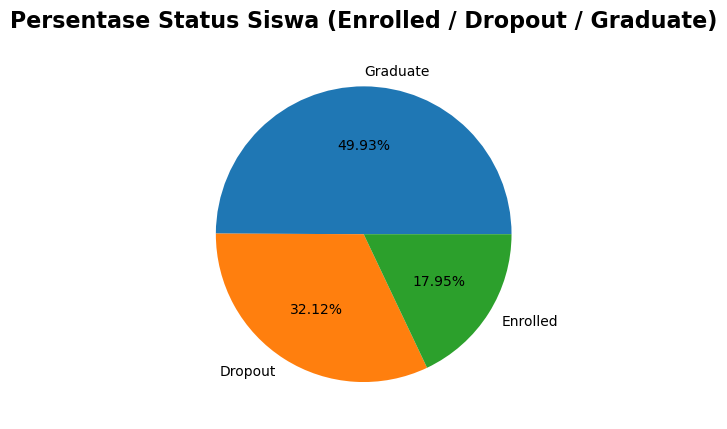

In [53]:
plt.pie(x=df['Status'].value_counts().values, labels=df['Status'].value_counts().index, autopct='%1.2f%%')
plt.title('Persentase Status Siswa (Enrolled / Dropout / Graduate)', fontsize=16, fontweight='bold', pad=16);

Siswa yang Graduate (lulus) memiliki persentase tertinggi dibandingkan yang lainnya, yaitu sebesar 49.93%.

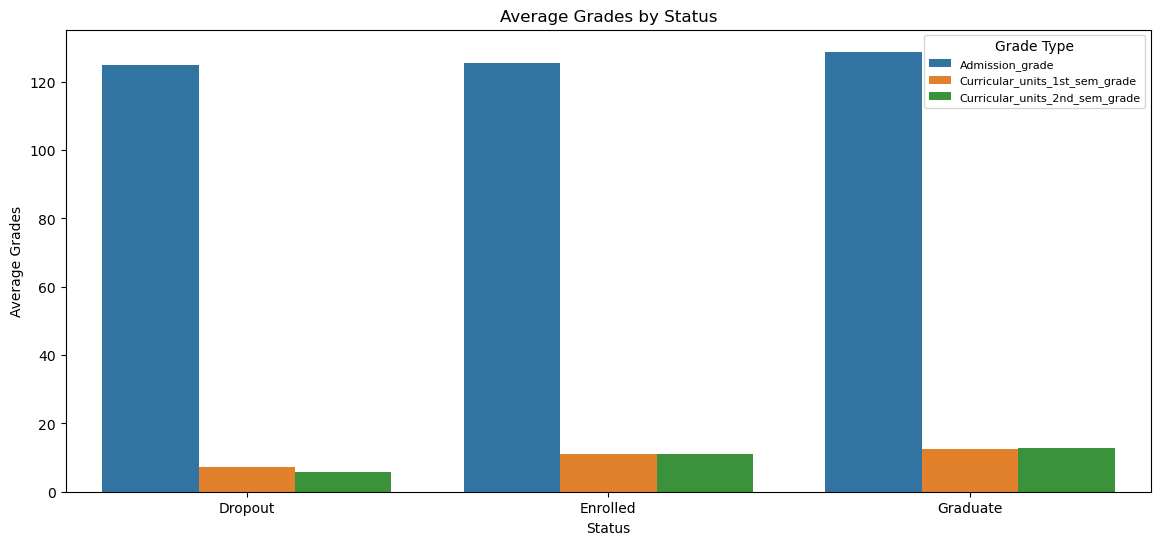

In [54]:
df_performance_melted = df_performance.melt(id_vars='Status', var_name='Grade Type', value_name='Average Grade')

plt.figure(figsize=(14, 6))
sns.barplot(x='Status', y='Average Grade', hue='Grade Type', data=df_performance_melted)

plt.title('Average Grades by Status')
plt.xlabel('Status')
plt.ylabel('Average Grades')
plt.legend(title='Grade Type', prop={'size': 8})
plt.show()

#### Melihat korelasi features lain terhadap Status

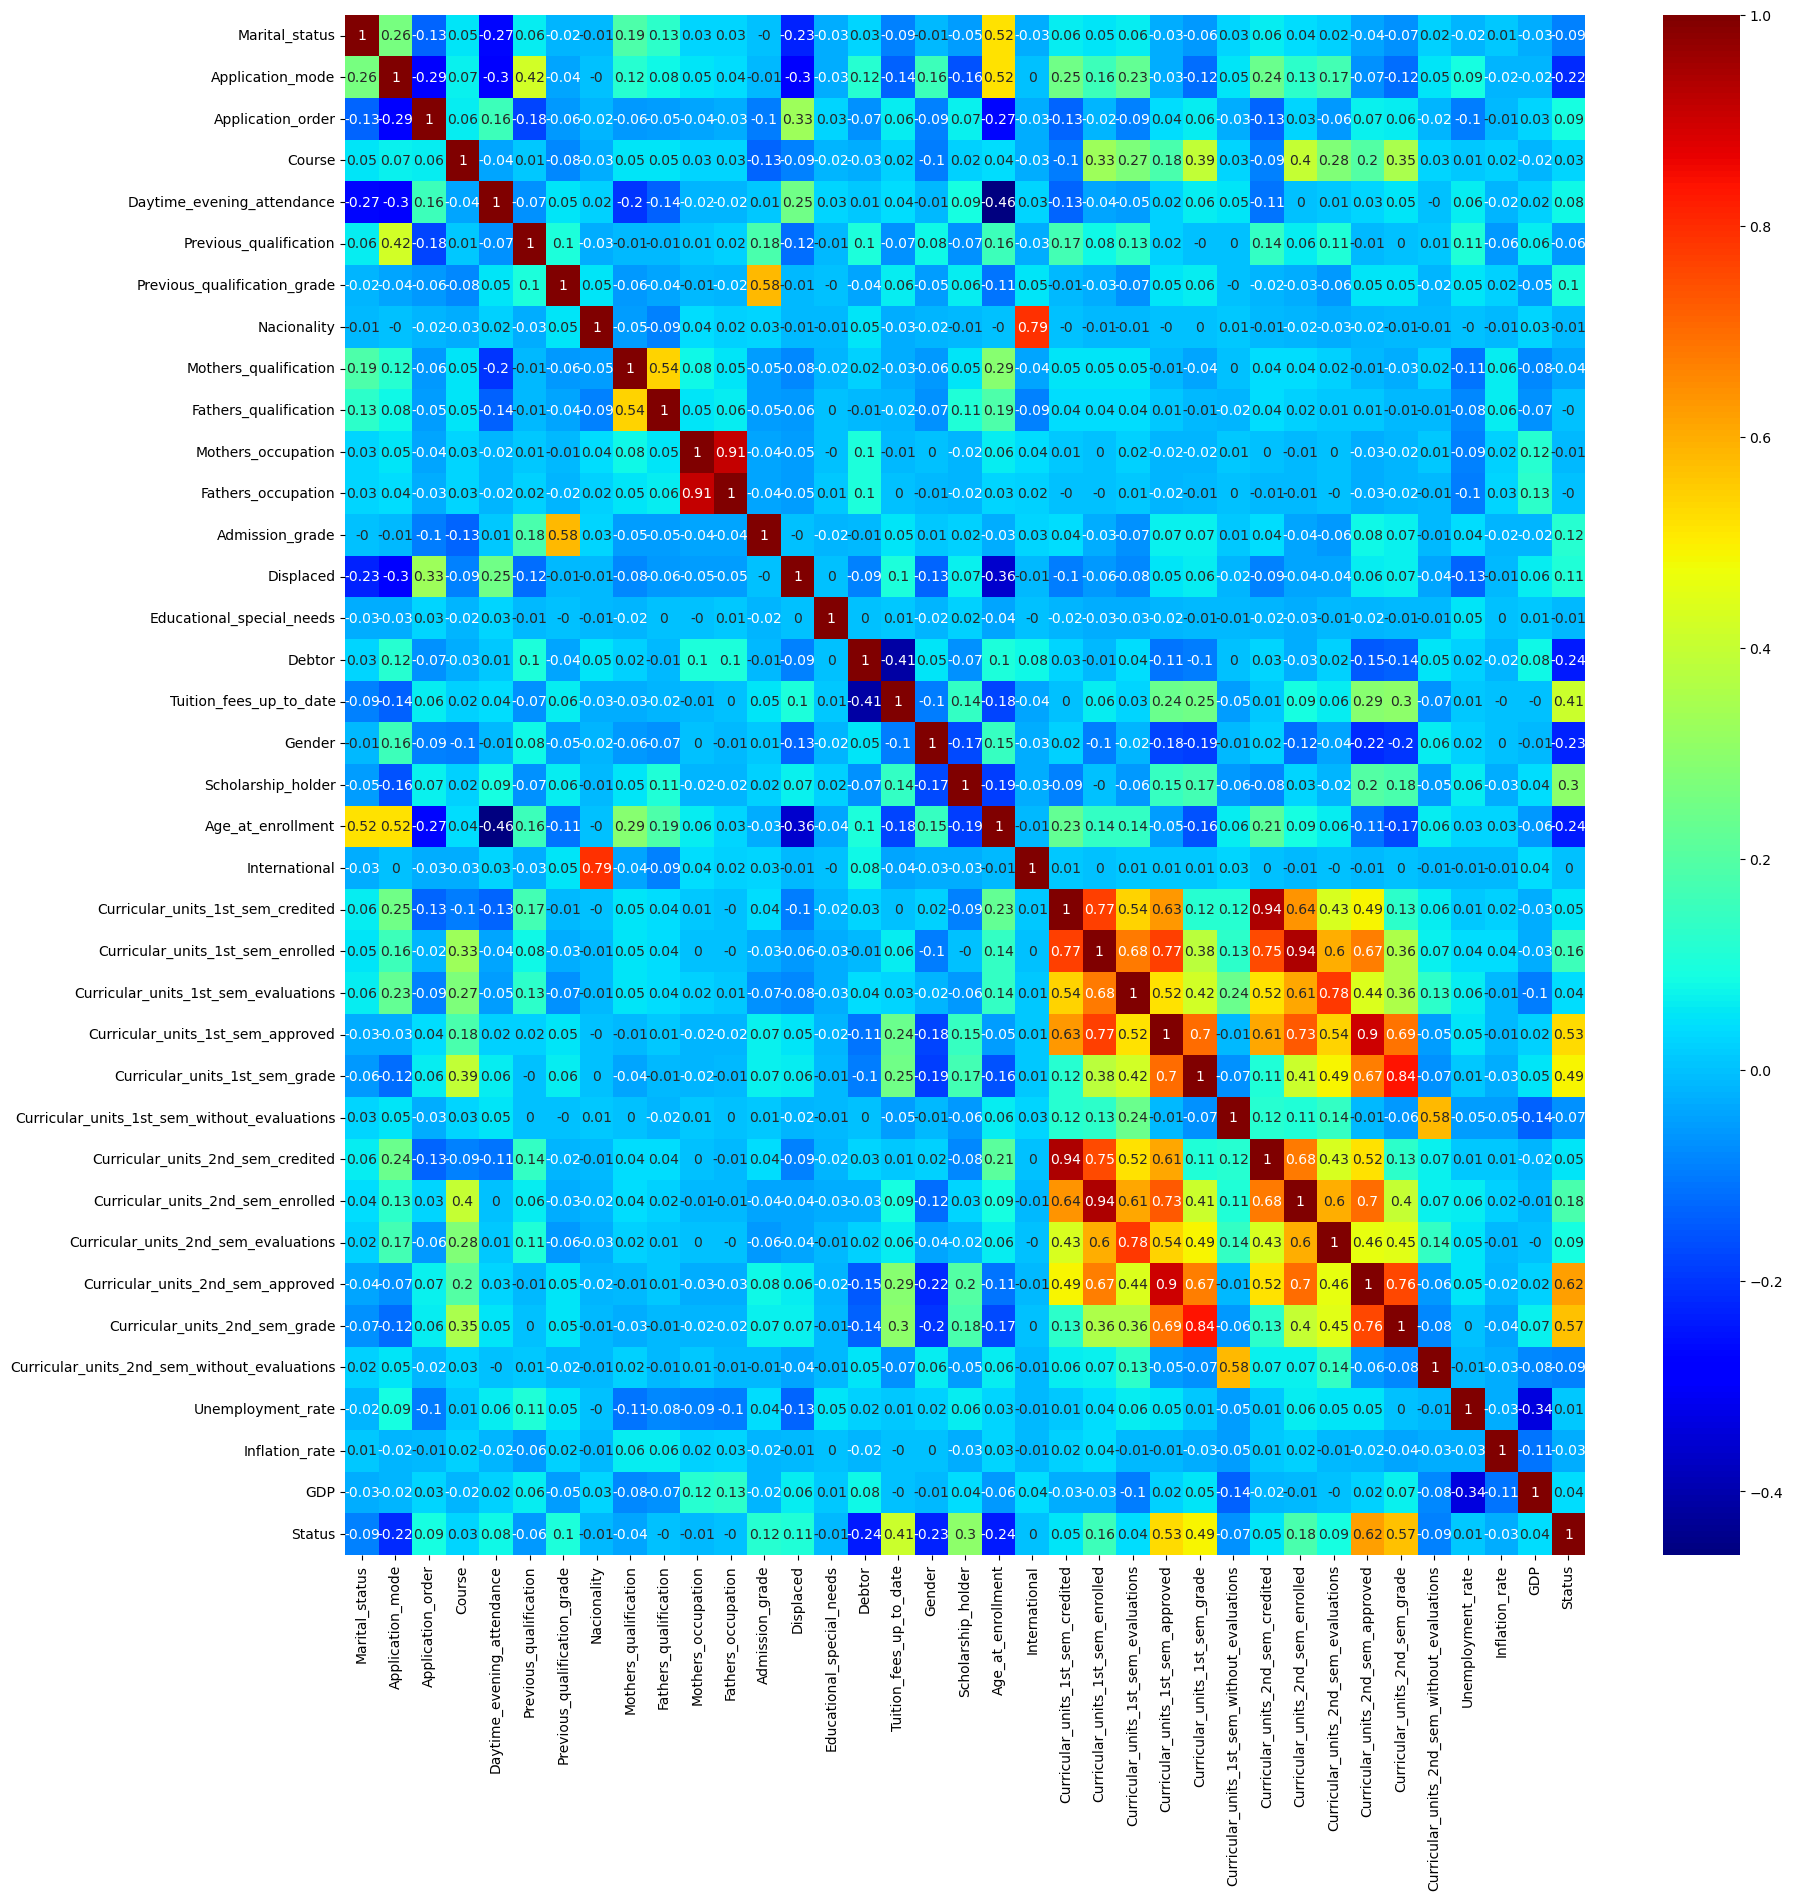

Curricular_units_2nd_sem_approved    0.624157
Curricular_units_2nd_sem_grade       0.566827
Curricular_units_1st_sem_approved    0.529123
Curricular_units_1st_sem_grade       0.485207
Tuition_fees_up_to_date              0.409827
Scholarship_holder                   0.297595
Age_at_enrollment                    0.243438
Debtor                               0.240999
Gender                               0.229270
Application_mode                     0.221747
Name: Status, dtype: float64

In [55]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

plt.figure(figsize=(20,20))
sns.heatmap(round(df.corr(), 2),annot=True,mask=None,cmap='jet')
plt.show()

status_corr = df.corr()
status_corr = status_corr['Status'].drop(labels='Status')
sort_abs_status_corr = status_corr.abs().sort_values(ascending=False)
top_10_features = sort_abs_status_corr.head(10)
top_10_features

In [56]:
top_10_features.index

Index(['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment',
       'Debtor', 'Gender', 'Application_mode'],
      dtype='object')

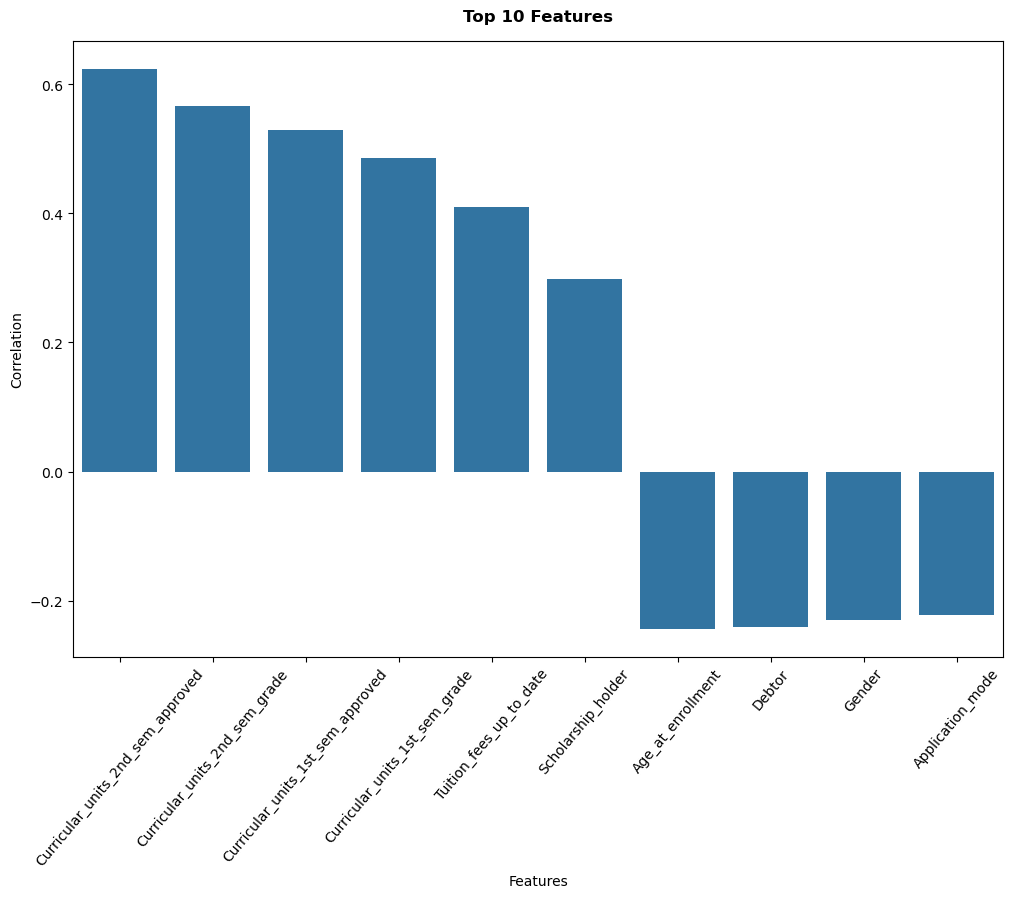

In [57]:
df_top_features = pd.DataFrame({
    'Features': top_10_features.index,
    'Correlation': status_corr[top_10_features.index].values
})

plt.subplots(figsize=(12,8))
sns.barplot(data=df_top_features, x='Features', y='Correlation')
plt.title('Top 10 Features', fontsize=12, fontweight='bold', pad=14)
plt.xticks(rotation=50);

#### Validasi features yang memiliki korelasi tinggi terhadap status

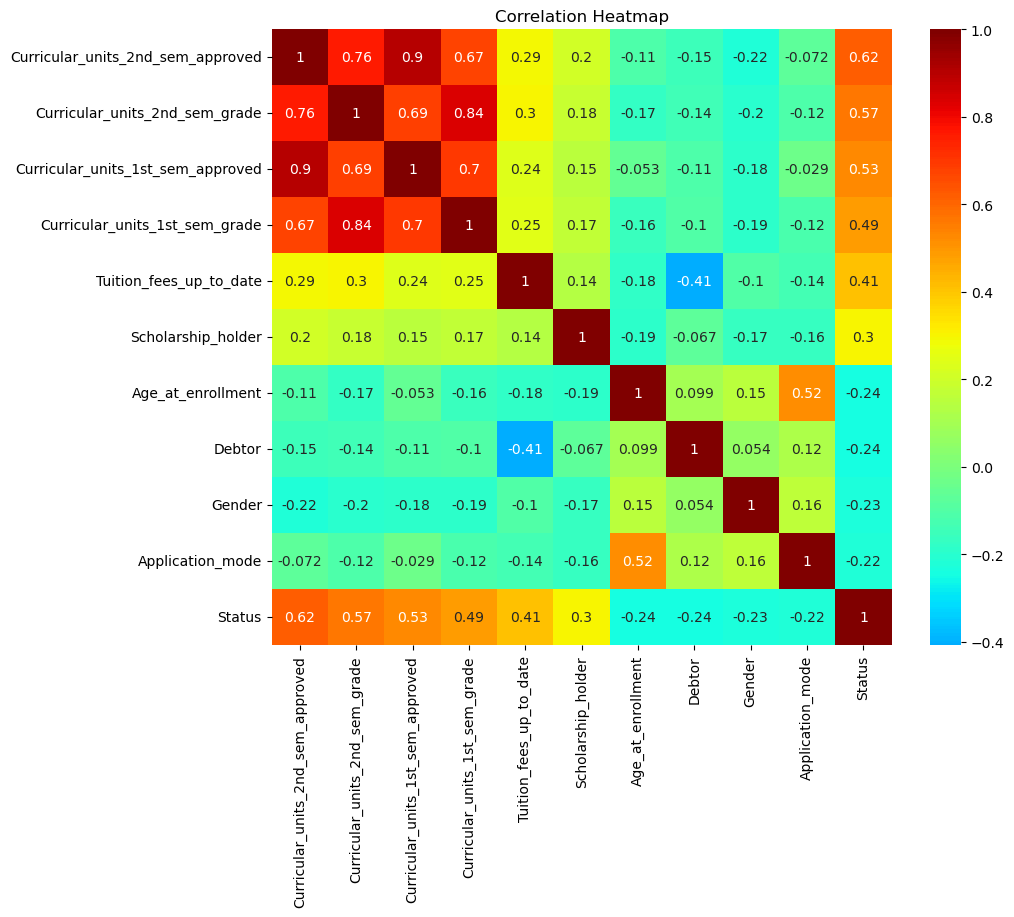

In [58]:
selected_features = list(df_top_features['Features'])
selected_features = [feature.strip().replace('\n', '').replace(' ', '') for feature in selected_features]

plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_features + ['Status']].corr(), annot=True, cmap='jet', center=0)

# Menambahkan judul
plt.title('Correlation Heatmap')
plt.show()

In [59]:
selected_features

['Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Tuition_fees_up_to_date',
 'Scholarship_holder',
 'Age_at_enrollment',
 'Debtor',
 'Gender',
 'Application_mode']

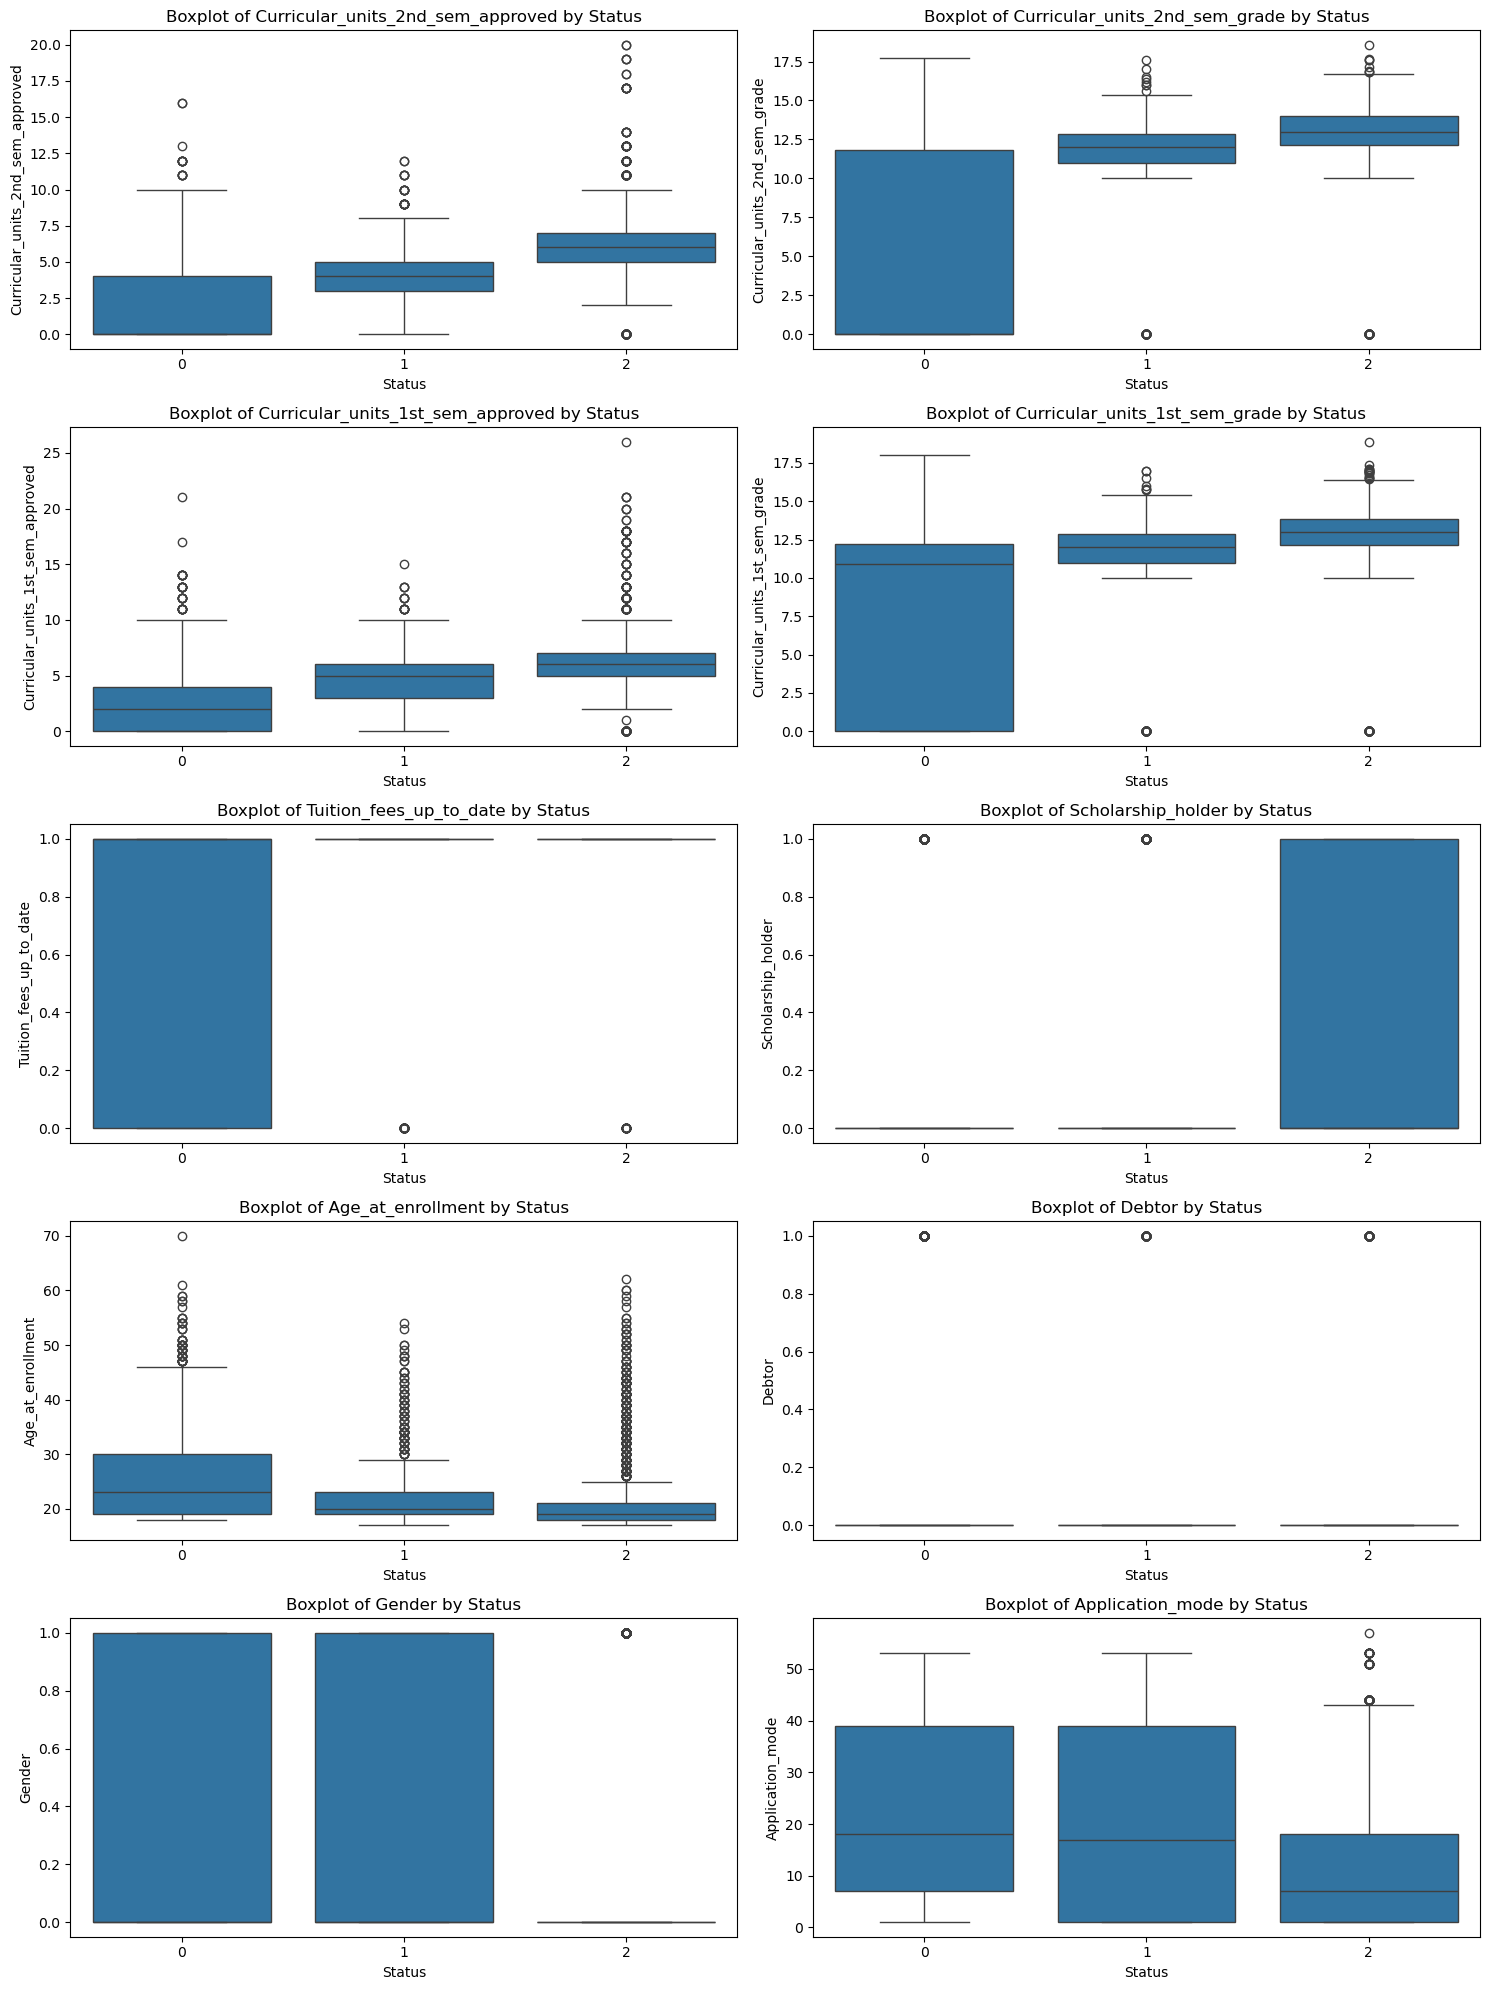

In [60]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Status', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Status')
    plt.xlabel('Status')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

**Kesimpulan**

- Siswa yang melakukan dropout cenderung mengambil sedikit kursus pada semester 1 & 2 serta nilai (grade) dari setiap kursus yang diambil cenderung rendah (0 - 11).
- Pembayaran biaya tepat waktu serta bantuan keuangan melalui beasiswa memiliki korelasi yang cukup kuat untuk menentukan apakah seorang siswa akan melakukan dropout ataupun tidak. Siswa yang melakukan dropout cenderung tidak melakukan pembayran ataupun telat melakukan pembayran. Hal ini disebabkan karena masalah ekonomi, serta tidak ikut atau terdaftarnya siswa tersebut pada program beasiswa. Permasalahan ekonomi serta tidak terdaftarnya siswa pada program beasiswa menyebabkan seorang siswa telat atau memiliki tunggakan pembayaran yang berakibat pada pilihan untuk melakukan dropout menjadi lebih besar.

In [61]:
df['Application_mode'][df['Status']==0].value_counts().sort_values(ascending=False)

Application_mode
39    435
1     345
17    256
43    115
7      85
44     63
18     45
42     34
51     20
16      5
15      5
53      4
10      3
5       2
2       2
26      1
27      1
Name: count, dtype: int64

In [62]:
df['Application_mode'][df['Status']==2].value_counts().sort_values(ascending=False)

Application_mode
1     1063
17     457
39     229
43     122
44      94
18      63
7       47
42      32
51      26
16      25
53      21
15      15
10       7
5        6
57       1
2        1
Name: count, dtype: int64

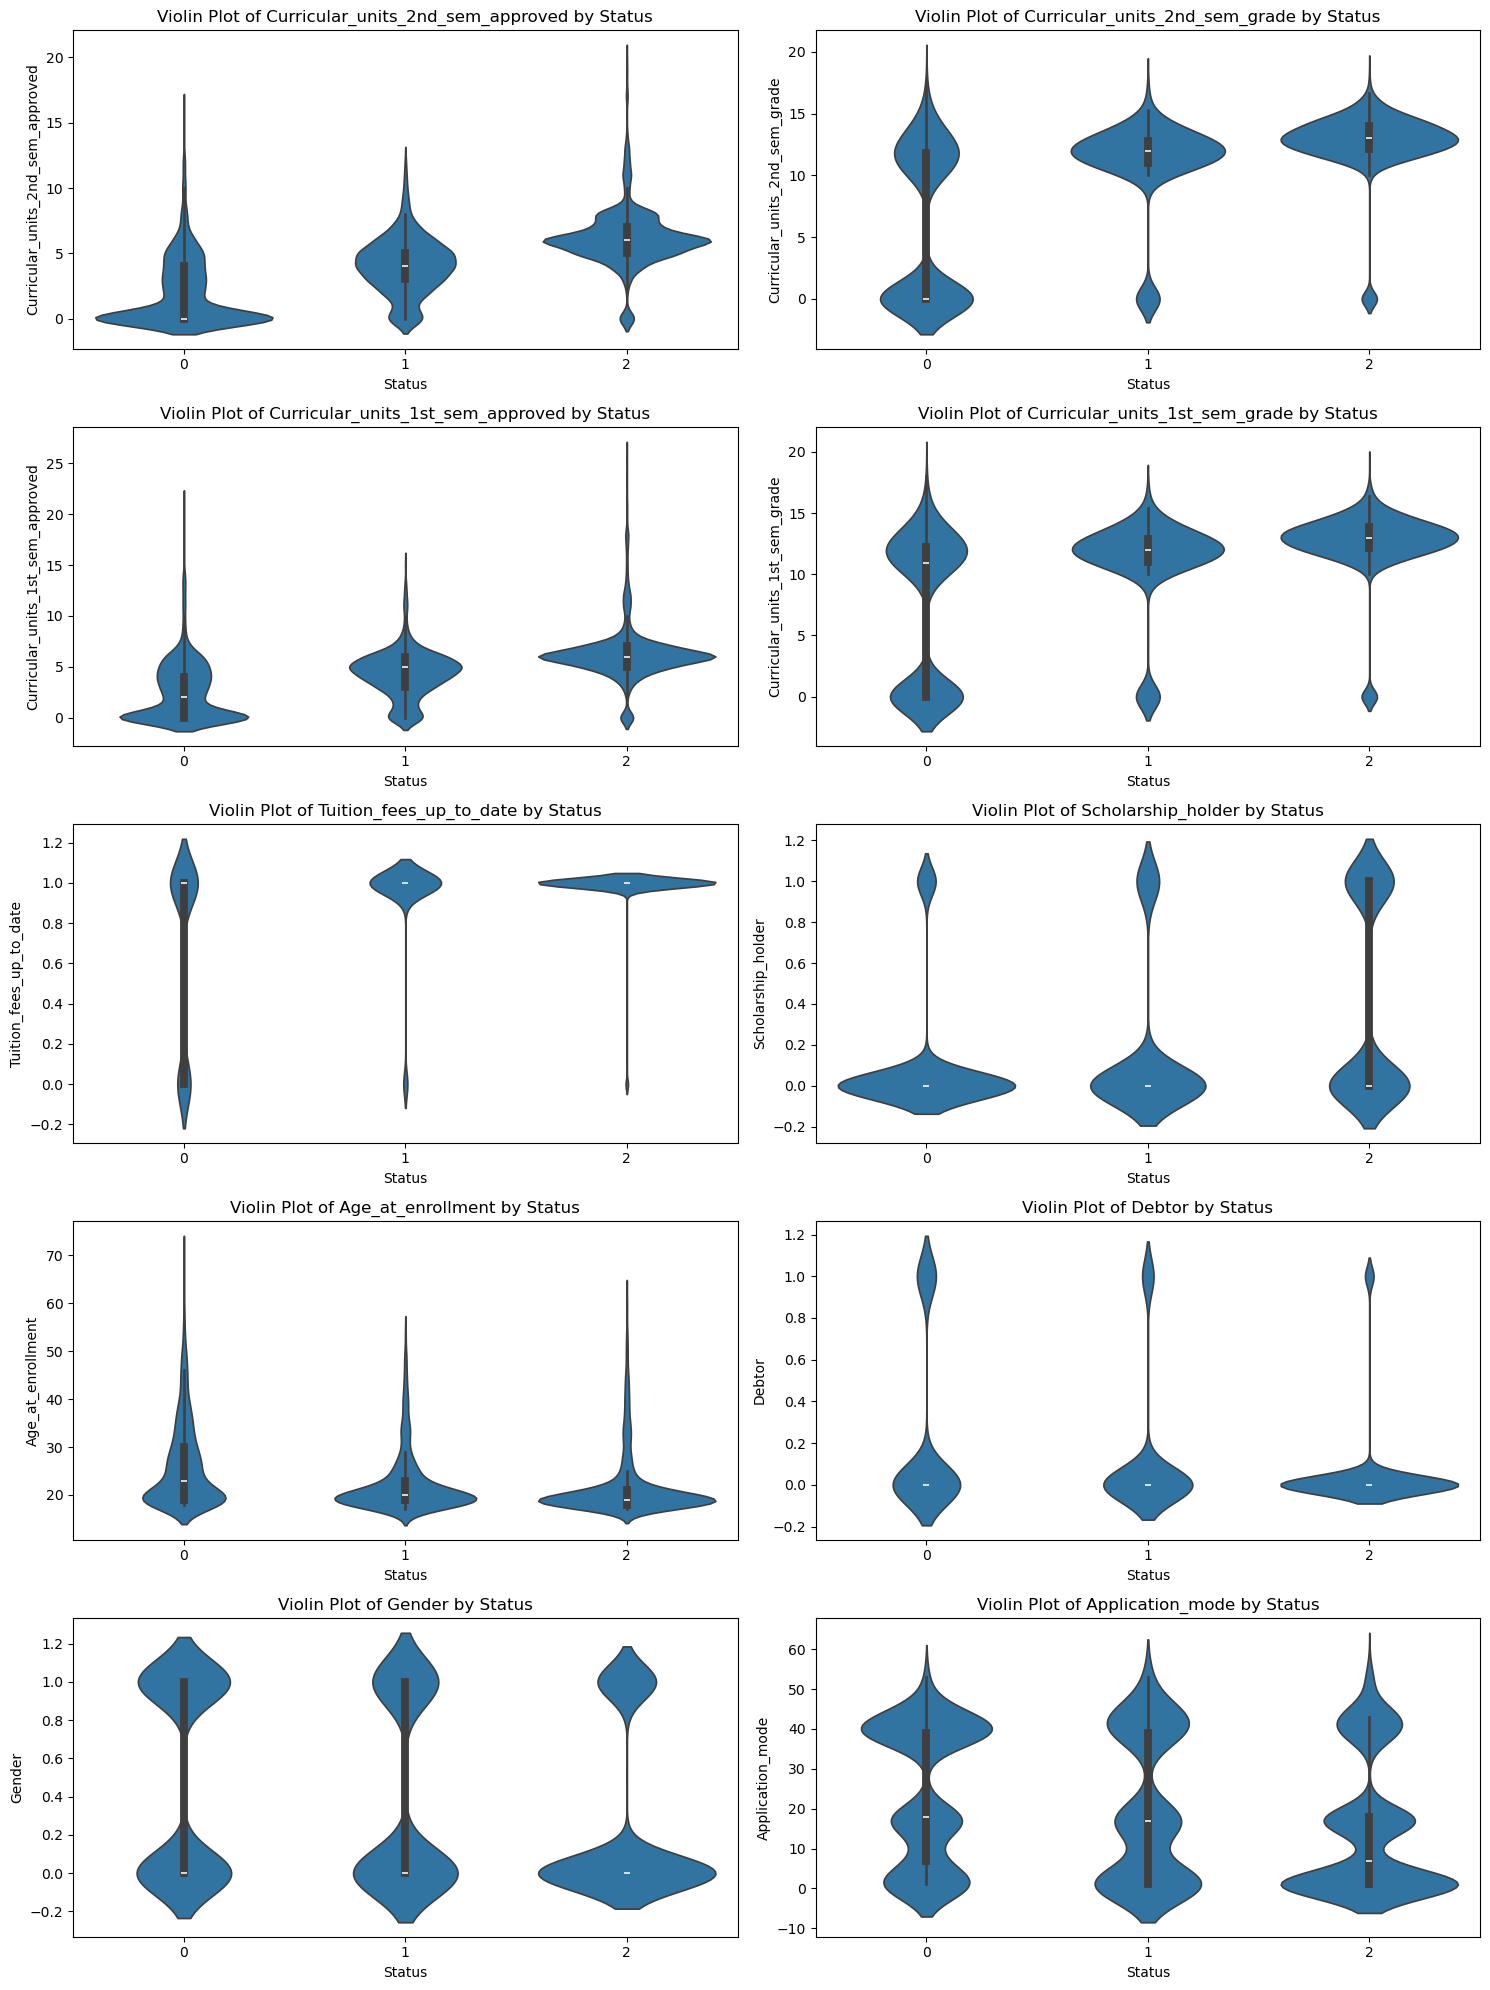

In [63]:
# Membuat violin plot untuk setiap fitur yang dipilih
plt.figure(figsize=(15, 20))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(5, 2, i)
    sns.violinplot(x='Status', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Status')
    plt.xlabel('Status')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


## Data Preparation / Preprocessing

#### Membuat dataframe menggunakan 10 features yang memiliki korelasi tertinggi terhadap status

In [64]:
main_df = df[top_10_features.index]
main_df['Status'] = df.loc[:, 'Status'].values
main_df['Status'] = [0 if status == 0 else 1 for status in df['Status']]
main_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16420\2971469319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Status'] = df.loc[:, 'Status'].values
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16420\2971469319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Status'] = [0 if status == 0 else 1 for status in df['Status']]


,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Gender,Application_mode,Status
0,0,0.000000,0,0.000000,1,0,20,0,1,17,0
1,6,13.666667,6,14.000000,0,0,19,0,1,15,1
2,0,0.000000,0,0.000000,0,0,19,0,1,1,0
3,5,12.400000,6,13.428571,1,0,20,0,0,17,1
4,6,13.000000,5,12.333333,1,0,45,0,0,39,1


In [65]:
main_df['Status'].value_counts()

Status
1    3003
0    1421
Name: count, dtype: int64

In [66]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Curricular_units_2nd_sem_approved  4424 non-null   int64  
 1   Curricular_units_2nd_sem_grade     4424 non-null   float64
 2   Curricular_units_1st_sem_approved  4424 non-null   int64  
 3   Curricular_units_1st_sem_grade     4424 non-null   float64
 4   Tuition_fees_up_to_date            4424 non-null   int64  
 5   Scholarship_holder                 4424 non-null   int64  
 6   Age_at_enrollment                  4424 non-null   int64  
 7   Debtor                             4424 non-null   int64  
 8   Gender                             4424 non-null   int64  
 9   Application_mode                   4424 non-null   int64  
 10  Status                             4424 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 380.3 KB


In [67]:
train_df, test_df = train_test_split(main_df, test_size=0.2, shuffle=True, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df.head(), test_df.head()

(   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
 0                                  0                        0.000000   
 1                                  2                       11.333333   
 2                                  6                       13.625000   
 3                                  0                        0.000000   
 4                                  6                       13.900000   
 
    Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
 0                                  0                        0.000000   
 1                                  3                       11.666667   
 2                                  6                       14.166667   
 3                                  0                        0.000000   
 4                                  6                       13.900000   
 
    Tuition_fees_up_to_date  Scholarship_holder  Age_at_enrollment  Debtor  \
 0                        1               

#### Unsersampling

Undersampling merupakan sebuah metode untuk mengatasi *imbalance* data, yaitu kondisi dimana jumlah nilai pada masing-masing label tidak seimbang. Undersampling digunakan agar model tidak mengalami bias saat membaca pola pada data. Bias yang dimaksud yaitu kecenderungan model untuk memprediksi kelas tertentu.

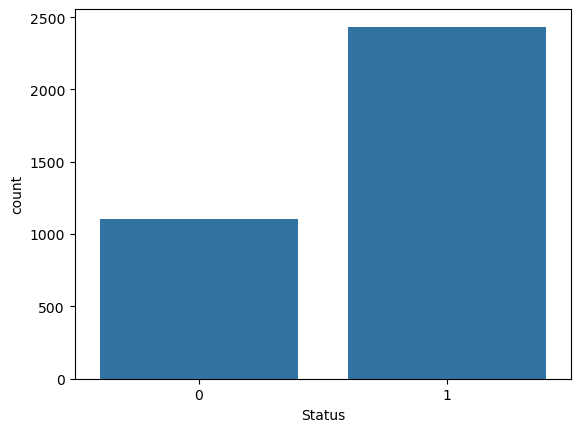

Status
1    2434
0    1105
Name: count, dtype: int64

In [68]:
sns.countplot(data=train_df, x='Status')
plt.show()

train_df['Status'].value_counts()

jumlah kelas pada label cenderung berada pada kelas '2'

In [69]:
df_majority = train_df[train_df['Status'] == 1]
df_minority = train_df[train_df['Status'] == 0]

len(df_majority), len(df_minority)

(2434, 1105)

In [70]:
df_majority_undersampled = resample(df_majority, n_samples=len(df_minority), random_state=42)

len(df_majority_undersampled), len(df_minority)

(1105, 1105)

In [71]:
undersampled_train_df = pd.concat([df_minority, df_majority_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)

undersampled_train_df['Status'].value_counts()

Status
0    1105
1    1105
Name: count, dtype: int64

In [72]:
X_train = undersampled_train_df.drop(columns='Status')
y_train = undersampled_train_df['Status']

X_test = test_df.drop(columns='Status')
y_test = test_df['Status']

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Curricular_units_2nd_sem_approved  2210 non-null   int64  
 1   Curricular_units_2nd_sem_grade     2210 non-null   float64
 2   Curricular_units_1st_sem_approved  2210 non-null   int64  
 3   Curricular_units_1st_sem_grade     2210 non-null   float64
 4   Tuition_fees_up_to_date            2210 non-null   int64  
 5   Scholarship_holder                 2210 non-null   int64  
 6   Age_at_enrollment                  2210 non-null   int64  
 7   Debtor                             2210 non-null   int64  
 8   Gender                             2210 non-null   int64  
 9   Application_mode                   2210 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 172.8 KB


#### Scaling Data

In [74]:
min_max = MinMaxScaler()

scaled_x_train = min_max.fit_transform(X_train)
scaled_x_test = min_max.fit_transform(X_test)

scaled_x_train

array([[0.4       , 0.65907258, 0.28571429, ..., 0.        , 0.        ,
        0.73076923],
       [0.3       , 0.71505376, 0.28571429, ..., 0.        , 0.        ,
        0.30769231],
       [0.15      , 0.63978495, 0.19047619, ..., 0.        , 1.        ,
        0.73076923],
       ...,
       [0.35      , 0.76612903, 0.52380952, ..., 0.        , 0.        ,
        0.80769231],
       [0.35      , 0.80346774, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.30769231]])

## Modeling

In [75]:
models = {
    'rf_model': RandomForestClassifier(),
    'gb_model': GradientBoostingClassifier(),
    'nn_model': MLPClassifier(),
    'lr_model': LogisticRegression()
}

for i, (name, model) in enumerate(models.items()):
    print(model)
    model.fit(X_train, y_train)
    print(f'Score of {name}: {model.score(X_test, y_test) * 100:.2f}%')
    print()

RandomForestClassifier()
Score of rf_model: 81.81%

GradientBoostingClassifier()
Score of gb_model: 83.16%

MLPClassifier()
Score of nn_model: 84.07%

LogisticRegression()
Score of lr_model: 84.75%



D:\Programming\AI_ML\Dicoding\Submission Akhir\env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Kesimpulan**

Berdasarkan pengujian setiap model, maka dapat diambil keputusan bahwa model LogisticRegression merupakan model yang terbaik dikarenakan score yang didapat cukup tinggi dibandingkan dengan score dari model lain.

In [76]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

D:\Programming\AI_ML\Dicoding\Submission Akhir\env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

#### Accurary Score

In [77]:
print(f'Accuracy Score of Logistic Regression Model: {accuracy_score(y_true=y_test, y_pred=y_pred) * 100:.2f}%')

Accuracy Score of Logistic Regression Model: 84.75%


#### Confusion Matrix

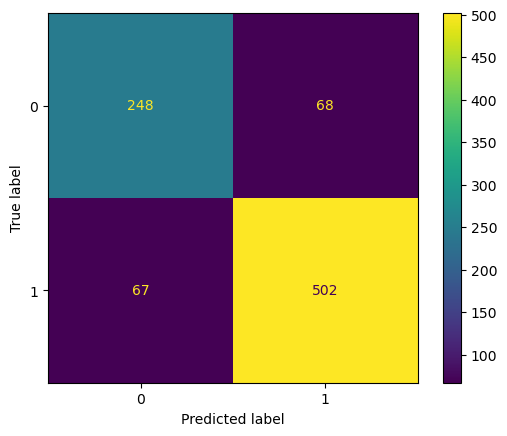

In [78]:
ConfusionMatrixDisplay.from_estimator(estimator=lr_model, X=X_test, y=y_test);

#### Saving Model

In [79]:
joblib.dump(lr_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']